# LINEAR REGRESSION
--- 

> A computer model is said to learn from experience E with regard to some class of tasks T and performance indicator P if its performance at tasks T, as measured by P, increases with experience. Consequently, 

$$E ∝ P\;\;for\;a\;given\;task\;T$$

### Supevised Learning
>We are provided a labelled data set, so we already know what our right output should look like, assuming that there is a relationship between the input and the output. This connection is critical to our technique as we try to create a linear regression model in Python.

Two Types: 
- Regression: Predict results within a continuous output.
- classification: Predict results in a discrete output.

### Unsupervised Learning
>We generate a structure from data in which we do not know the influence of the variables. This structure is generated by clustering the data according to the relationships between the variables in the data. It is like exploring, we define and group things ourselves and then whenever we are wrong on something novel we alter our pre set parameters or notions and learn. Well the very idea of AI was to design a machine that could behave as humans or human brain to be precise.

### Model Representation
The accuracy of hypothesis function is measured using a **cost function**. A cost function is a measure of how much error we are incurring by predicting a value using our hypothesis function, measured against the label in the dataset. This function is basically a squared error function or a mean squared error function.

$Hypothesis:$ $h_{\theta}(x) = \theta_{0} + \theta_{1}x\\\\$
$Parameters:$ $\theta_{0}, \theta_{1}\\\\ \\\\$
$Cost\;Function:$
$J(\theta_{0}, \theta_{1}) = \frac{1}{2m}\sum_{i=1}^{m} (h_{\theta}(x_{i})-y_{i})^{2}\\\\$
$Goal\;=$ $Minimize\;J(h_{\theta_{0}},h_{\theta_{1}})$

The mean is halved by introducing a factor of $2$, as a convenience for the computation of the gradient descent, as the derivative term of the square function will cancel out the $1/2$ term.

### Gradient Descent 
> This can be called the main part of the algorithm. As it is in thi part that we actually alter our parameters and finally get a best fitting hypothesis for our training data.The idea of gradient descent is to iteratively reduce the value of cost function, hence moving in the direction of decresing error, or more formally, moving iteratively in the direction of steepest gradient of the cost functions.

>The gradient descent algorithm we use is given below, which is repeated untill it converges to minima:

$$ \theta_{j}=\theta_{j}-\alpha * J(h_{\theta_{0}},h_{\theta_{1}})$$

Here, $\alpha$ is the *learning rate* which gives us the step we need to take for every iteration in the directon of a global minima.The learning rate  is a parameter defining how fast we intend to converge to the minima of the cost function. But a certain and unavoidable tradeoff is involved. A high learning rate, though leads to faster convergence to a value, but is associated with an efficient model. On the other hand, a very small learning rate, though trains an excellent predictive model, but takes large number of iterations to converge to minima. This trade-off has to be kept in mind while determining the learning rate.

The direction of the step taken is determined by the partial derivative of $J(\theta_{0},\theta_{1})$. Depending on the starting point, one can end up at different points.

$$temp_{0}=\theta_{0}-\alpha *d/d\theta_{0} (J(\theta_{0},\theta_{1}))$$
$$temp_{1}=\theta_{1}-\alpha *d/d\theta_{1} (J(\theta_{0},\theta_{1}))$$
$$\theta_{0}=temp_{0}$$
$$\theta_{1}=temp_{1}$$

This can be continued till our change in the parameters converge to a minimum  with respect to the number of iteration.






           
        

### PYTHON IMPLEMENTATION
>Importing Libraries

In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

>Importing the training data.

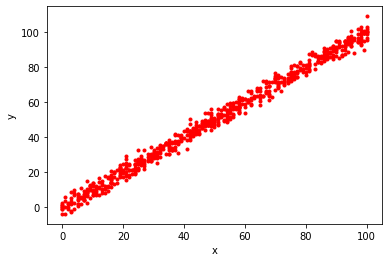

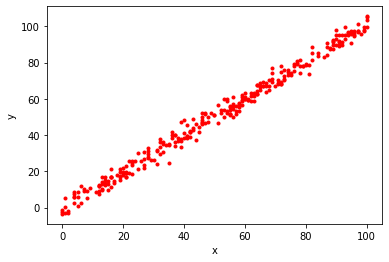

In [12]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
dataset = list(zip(train.x, train.y))
testData = list(zip(test.x,test.y))
for i in dataset: plt.plot(i[0], i[1], 'r.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
for i in testData: plt.plot(i[0],i[1],'r. ')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


>Main algorithm

In [22]:
learning_rate = 0.000001
steps = 100000

O0 = -1.0
O1 = 1.0

def hypothesis(O0, O1, x):
    return O0+(x*O1)

def J0(O0, O1, x, y):
    S = 0.0
    N = 700
    for i in range(N):
        S+=((hypothesis(O0, O1, x[i])-y[i]))

    return (1/N)*(S)

def J1(O0, O1, x, y):
    S = 0.0
    N = 700
    for i in range(N):
        S+=(((hypothesis(O0, O1, x[i])-y[i]))*x[i])

    return (1/N)*(S)

while (steps):
    temp0 = O0-(learning_rate*J0(O0, O1, list(train.x), list(train.y)))
    temp1 = O1-(learning_rate*J1(O0, O1, list(train.x), list(train.y)))
    O0 = temp0
    O1 = temp1
    steps -= 1

print(O0, O1)

-0.9780155892325115 1.013636616574779


>Plotting the hypothesis function after training. 

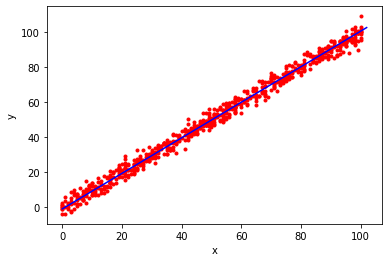

In [24]:
for i in dataset: plt.plot(i[0], i[1], 'r.')
x = np.array([0.0 ,50.0,102.0])
y = O0+O1*x
plt.plot(x,y,'b')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

>Now we need to test the hypothesis if it is any good.

In [27]:
# new hypothesis function is = O0+O1*x
# what we can do to test our function is plot but initiallu we had set value of O0=-2.0 , O1=1.0
# we can calculate the value of cost function for the final and initial parameters 
def Jt(O0,O1,x,y):
    S = 0.0
    N = 300
    for j in range(N):
        S+=(hypothesis(O0,O1,x[j])-y[j])**2

    return (S/N)
    
costFinal = Jt(O0,O1,list(test.x),list(test.y))
costInitial = Jt(-2.0,1.0,list(test.x),list(test.y))

print(costFinal,costInitial)
 

9.46916230406285 14.476268759572735


we can clearly see that the initial squared error is more than that of the parameters when we have trained our model. If we increase the number of iteration of the training model then we can get better outcomes that is more efficiently trained model or hypothesis.